# Table of contents
- Imports
- Read in data
- Converting UTC
- Lemmatize
- CountVectorize with stopwords: Relationship_Advice
- CountVectorize with stopwords: Am_I_The_Asshole
- Feature Words
- Polarity Score
- Distribution of AITA Polarity
- Distribution of Relationship Advice Polarity
- Comparing words in common from AITA, RA
- Export for modeling


# Imports

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
import spacy
import datetime
from spacy.tokens import Doc


# Read in data

In [2]:
df_ra = pd.read_csv('../Data/RA_final')
df_aita = pd.read_csv('../Data/AITA_final')

# Converting UTC

In [3]:
df_ra.head()

,Unnamed: 0,author,subreddit,selftext,title,created_utc
0,0,TaintedOne88,relationship_advice,I just text this man telling him how I felt ab...,A permanent memory,1669248902
1,1,UncommonCow56,relationship_advice,Ok so as the title says my (M18) girlfriend (F...,My (M18) gf (F20) keeps dog sitting for a “fri...,1669248796
2,3,darkglassoverwater,relationship_advice,I'm a junior in high school (male). I have a l...,Friendzone or does she like me?,1669248786
3,4,YourAverageThinker,relationship_advice,Me and this girl used to talk at the beginning...,Girl (21F) is so confusing I (M21) just don’t ...,1669248776
4,5,Illustrious-Ask1708,relationship_advice,I've been seeing this girls who's as the title...,What's everyone's thoughts on an 18yr old fema...,1669248658


In [4]:
df_ra['when'] = pd.to_datetime(df_ra['created_utc'], unit='s')
df_ra.drop(columns=['Unnamed: 0','created_utc'], inplace=True)
df_ra.dropna(inplace=True)
df_ra.head()

,author,subreddit,selftext,title,when
0,TaintedOne88,relationship_advice,I just text this man telling him how I felt ab...,A permanent memory,2022-11-24 00:15:02
1,UncommonCow56,relationship_advice,Ok so as the title says my (M18) girlfriend (F...,My (M18) gf (F20) keeps dog sitting for a “fri...,2022-11-24 00:13:16
2,darkglassoverwater,relationship_advice,I'm a junior in high school (male). I have a l...,Friendzone or does she like me?,2022-11-24 00:13:06
3,YourAverageThinker,relationship_advice,Me and this girl used to talk at the beginning...,Girl (21F) is so confusing I (M21) just don’t ...,2022-11-24 00:12:56
4,Illustrious-Ask1708,relationship_advice,I've been seeing this girls who's as the title...,What's everyone's thoughts on an 18yr old fema...,2022-11-24 00:10:58


In [5]:
df_ra.tail()

,author,subreddit,selftext,title,when
6829,KhalessiBlk,relationship_advice,My bf (30m) and I (29f) broke up very recently...,I Gave Up After 6 Months,2022-11-10 18:21:50
6830,Weary-Ad-4391,relationship_advice,Me and her are in the same program at universi...,My (19 M) friend’s (20 M) GF (21) came onto me,2022-11-10 18:20:41
6831,This_Beyond_2115,relationship_advice,I am in a relationship and for the most part i...,This relationship appears to be progressing sl...,2022-11-10 18:20:39
6832,FormerShadow1,relationship_advice,"Basically, they think people with depression a...",How do I deal with a person who hates me becau...,2022-11-10 18:20:17
6833,zman419,relationship_advice,Last time my girlfriend and I spent time with ...,girlfriend is considering not seeing my parent...,2022-11-10 18:19:05


In [6]:
df_aita.head()

,Unnamed: 0,author,subreddit,selftext,title,created_utc
0,1,Cain_Everest,AmItheAsshole,Let me preface this: I am one of those guys wh...,AITA for letting my former bff rot in prison f...,1669246532
1,2,TheVillagerC,AmItheAsshole,"Recently, I (21F) met up with my (55M) father....",AITA for never choosing to get closer to my fa...,1669246470
2,3,Eat_yourHeart_0ut,AmItheAsshole,"I know I probably am an asshole, but I want to...",WIBTA for listening to my mom's phone conversa...,1669246461
3,5,flxwsxndsxns,AmItheAsshole,My mum fell out with her whole family 15 years...,AITA for not wanting to attend my aunt's wedding?,1669246271
4,7,kixx20,AmItheAsshole,I’ll make it kinda quick but here it is. \n\nS...,AITA for not going to thanksgiving dinner?,1669246254


In [7]:
df_aita['when'] = pd.to_datetime(df_aita['created_utc'], unit='s')
df_aita.drop(columns=['created_utc', 'Unnamed: 0'],inplace=True)
df_aita.drop
df_aita.head()

,author,subreddit,selftext,title,when
0,Cain_Everest,AmItheAsshole,Let me preface this: I am one of those guys wh...,AITA for letting my former bff rot in prison f...,2022-11-23 23:35:32
1,TheVillagerC,AmItheAsshole,"Recently, I (21F) met up with my (55M) father....",AITA for never choosing to get closer to my fa...,2022-11-23 23:34:30
2,Eat_yourHeart_0ut,AmItheAsshole,"I know I probably am an asshole, but I want to...",WIBTA for listening to my mom's phone conversa...,2022-11-23 23:34:21
3,flxwsxndsxns,AmItheAsshole,My mum fell out with her whole family 15 years...,AITA for not wanting to attend my aunt's wedding?,2022-11-23 23:31:11
4,kixx20,AmItheAsshole,I’ll make it kinda quick but here it is. \n\nS...,AITA for not going to thanksgiving dinner?,2022-11-23 23:30:54


In [8]:
df_aita.tail()

,author,subreddit,selftext,title,when
6403,ameliajohnso,AmItheAsshole,So a lady came over to me and looking at my ba...,AITA for embarrassing a lady at the grocery st...,2022-11-24 12:59:34
6404,DerangedUnicorn27,AmItheAsshole,Every year I always end up with a bunch of use...,AITA for being specific about what I want for ...,2022-11-24 12:54:39
6405,silversteeledviking,AmItheAsshole,At my previous job (from 3 years ago) I worked...,AITA for leaving a mess of diarrhea for a cowo...,2022-11-24 12:53:41
6406,Throw32432577,AmItheAsshole,"\nMy fiance m24, and I f25 are in the process ...",AITA for saying that my sister is trying to co...,2022-11-24 12:52:42
6407,krisforsigns,AmItheAsshole,I (21f) am in third year of university. Recent...,AITA for not wanting to work on a project anym...,2022-11-24 12:50:39


In [9]:
df_ra['author'].value_counts(ascending=True)

TaintedOne88            1
AdventurousThing3727    1
Gold_Candy_6748         1
partyshere123           1
Maximum_Advisor5078     1
                       ..
lazy_philospher         1
secretaixam             1
anonkkcsmkx             1
darlingevaa             1
zman419                 1
Name: author, Length: 6833, dtype: int64

# Lemmatize

In [10]:
# Code taken from twitter after google search : https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb
wnl = WordNetLemmatizer()

def clean_text(text):
       
    text = text.lower() # To lowercase    
    text = re.sub(r'\&\w*;', '', text) # Remove HTML special entities (e.g. &)        
    text = re.sub(r'\s\s+', ' ', text) # Remove whitespace (including new line characters)        
    text = re.sub(r'https?:\/\/.*\/\w*', '', text) # Remove hyperlinks 

    
    words = text.split()
    
    words_2 = []

    for word in words: 
        word_2 = wnl.lemmatize(word)
       
        words_2.append(word_2)      

    output = ' '.join(words_2)
    return output 

In [11]:
df_aita['selftext'] = df_aita['selftext'].apply(clean_text)
df_aita['selftext'].head()

0    let me preface this: i am one of those guy who...
1    recently, i (21f) met up with my (55m) father....
2    i know i probably am an asshole, but i want to...
3    my mum fell out with her whole family 15 year ...
4    i’ll make it kinda quick but here it is. so my...
Name: selftext, dtype: object

In [13]:
df_ra['selftext'] = df_ra['selftext'].apply(clean_text)
df_ra['selftext'].head()

0    i just text this man telling him how i felt ab...
1    ok so a the title say my (m18) girlfriend (f20...
2    i'm a junior in high school (male). i have a l...
3    me and this girl used to talk at the beginning...
4    i've been seeing this girl who's a the title s...
Name: selftext, dtype: object

## CountVectorize with stopwords: Relationship_Advice

In [14]:
cvec_ra = CountVectorizer(stop_words='english')
cvec_ra.fit(df_ra['selftext'])

len_features = len(cvec_ra.get_feature_names())
print(len_features)


21336


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df_ra_words = pd.DataFrame(cvec_ra.transform(df_ra['selftext']).todense(),columns=cvec_ra.get_feature_names())

ra_features = df_ra_words.sum(axis=0)
ra_features.sort_values(ascending = False).head() #Creating a data frame of stopwords from RA

wa      21054
like    12943
just    12400
time     9686
want     8818
dtype: int64

In [16]:
df_ra_words= ra_features.to_frame(name='count')
df_ra_words['freq'] = df_ra_words['count'] / len(df_ra) * 100
df_ra_words['word'] =df_ra_words.index
df_ra_words['subreddit'] = 'relationship_advice'
cols = ['word','count','freq','subreddit']
df_ra_words = df_ra_words[cols]
df_ra_words.sort_values(by='count',ascending=False, inplace=True)
df_ra_words.head() #Adding count and frequency of word to data frame


,word,count,freq,subreddit
wa,wa,21054,308.122347,relationship_advice
like,like,12943,189.418996,relationship_advice
just,just,12400,181.472267,relationship_advice
time,time,9686,141.753256,relationship_advice
want,want,8818,129.050198,relationship_advice


## CountVectorize with stopwords: Am_I_The_Asshole

In [17]:
cvec_aita = CountVectorizer(stop_words='english')
cvec_aita.fit(df_aita['selftext'])

len_features = len(cvec_aita.get_feature_names())
print(len_features)


24996


C:\Users\Sparrow\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
df_aita_words = pd.DataFrame(cvec_aita.transform(df_aita['selftext']).todense(),columns=cvec_aita.get_feature_names())

aita_features = df_aita_words.sum(axis=0)
aita_features.sort_values(ascending = False).head() #Creating a data frame of stopwords from AITA

wa      26988
just     9715
said     8784
like     8717
told     7995
dtype: int64

In [19]:
df_aita_words= aita_features.to_frame(name='count')
df_aita_words['freq'] = df_aita_words['count'] / len(df_aita) * 100
df_aita_words['word'] =df_aita_words.index
df_aita_words['subreddit'] = 'AmItheAsshole'
cols = ['word','count','freq','subreddit']
df_aita_words = df_aita_words[cols]
df_aita_words.sort_values(by='count',ascending=False, inplace=True)
df_aita_words.head() #Adding count and frequency of word to data frame

,word,count,freq,subreddit
wa,wa,26988,421.161049,AmItheAsshole
just,just,9715,151.607366,AmItheAsshole
said,said,8784,137.078652,AmItheAsshole
like,like,8717,136.033084,AmItheAsshole
told,told,7995,124.765918,AmItheAsshole


## Feature Words

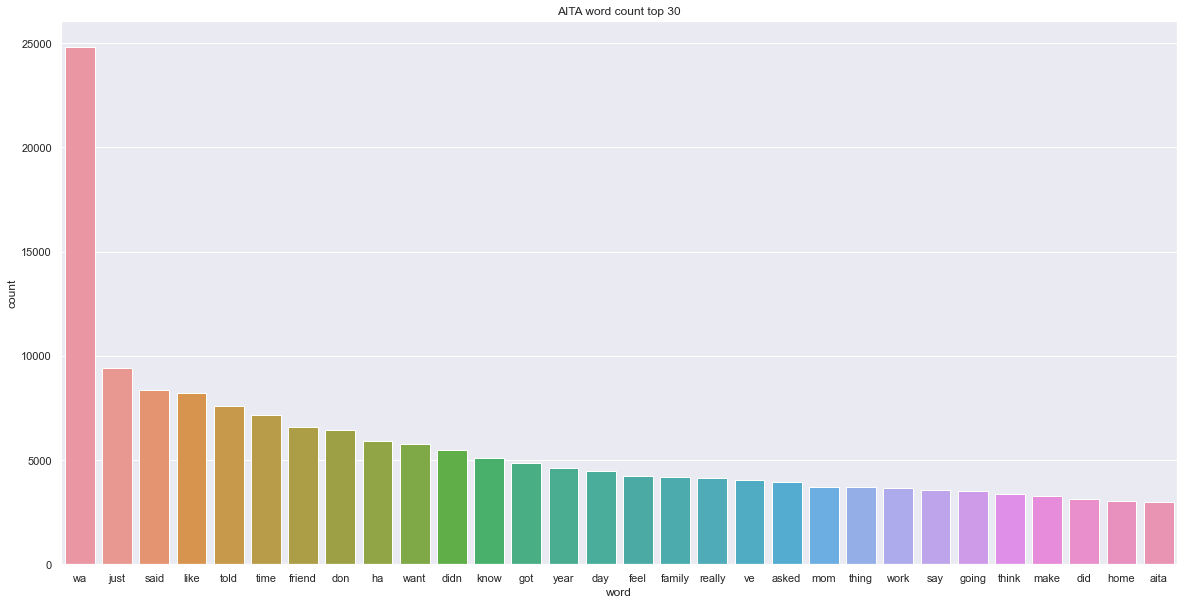

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_aita_words.head(30),x='word',y='count')
plt.title('AITA word count top 30'); #word count of top 30 words
plt.savefig('AITA top 30.png')

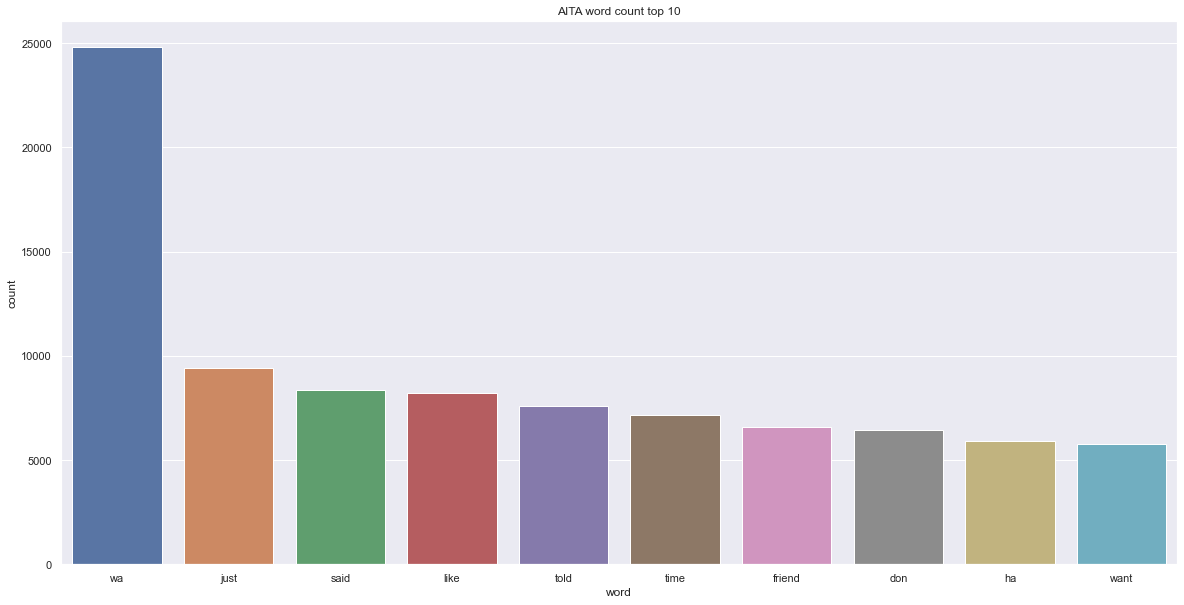

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_aita_words.head(10),x='word',y='count')
plt.title('AITA word count top 10');
plt.savefig('AITA top 10.png')#word count of top 10 words

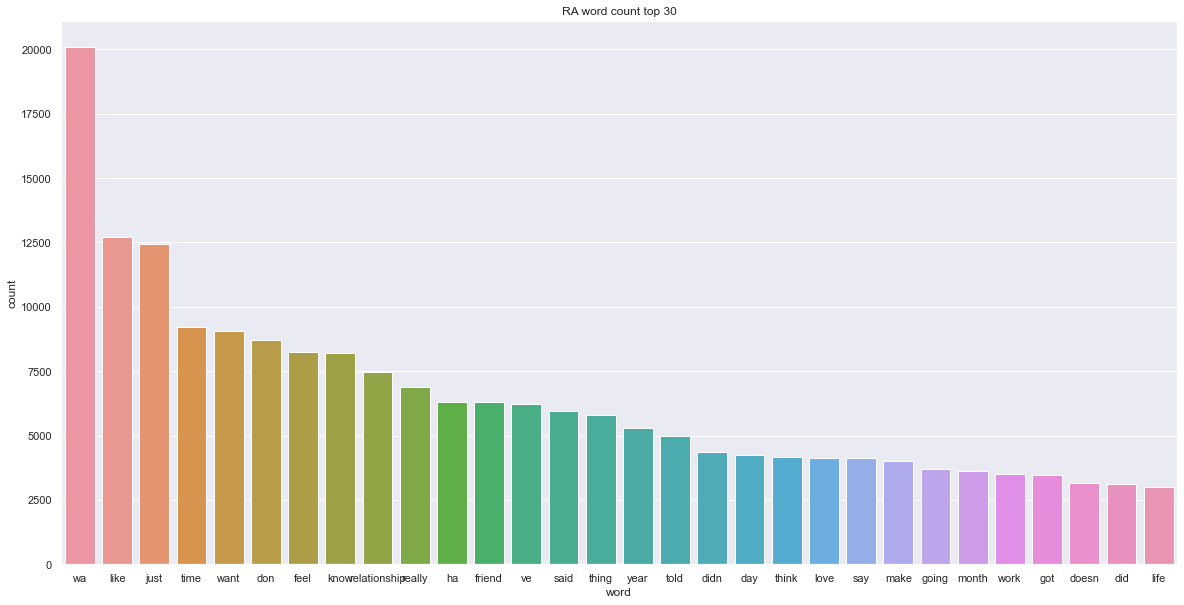

In [93]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_ra_words.head(30),x='word',y='count')
plt.title('RA word count top 30');
plt.savefig('RA top 30.png')

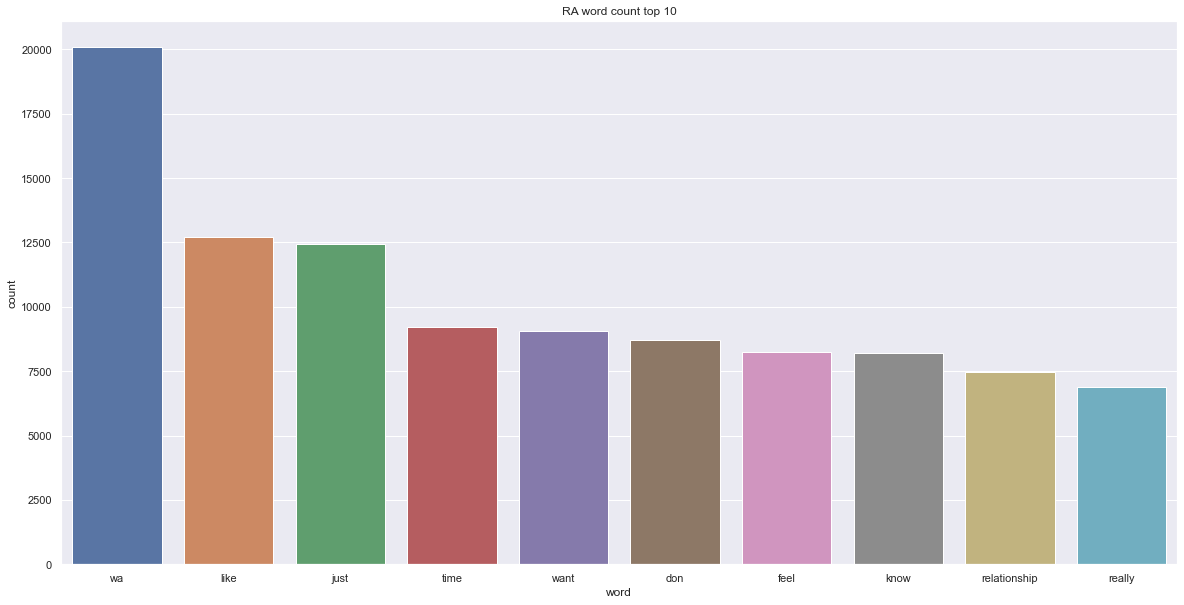

In [94]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_ra_words.head(10),x='word',y='count')
plt.title('RA word count top 10');
plt.savefig('RA top 10.png')

- Double bar comparing top 10 words, top 30 words

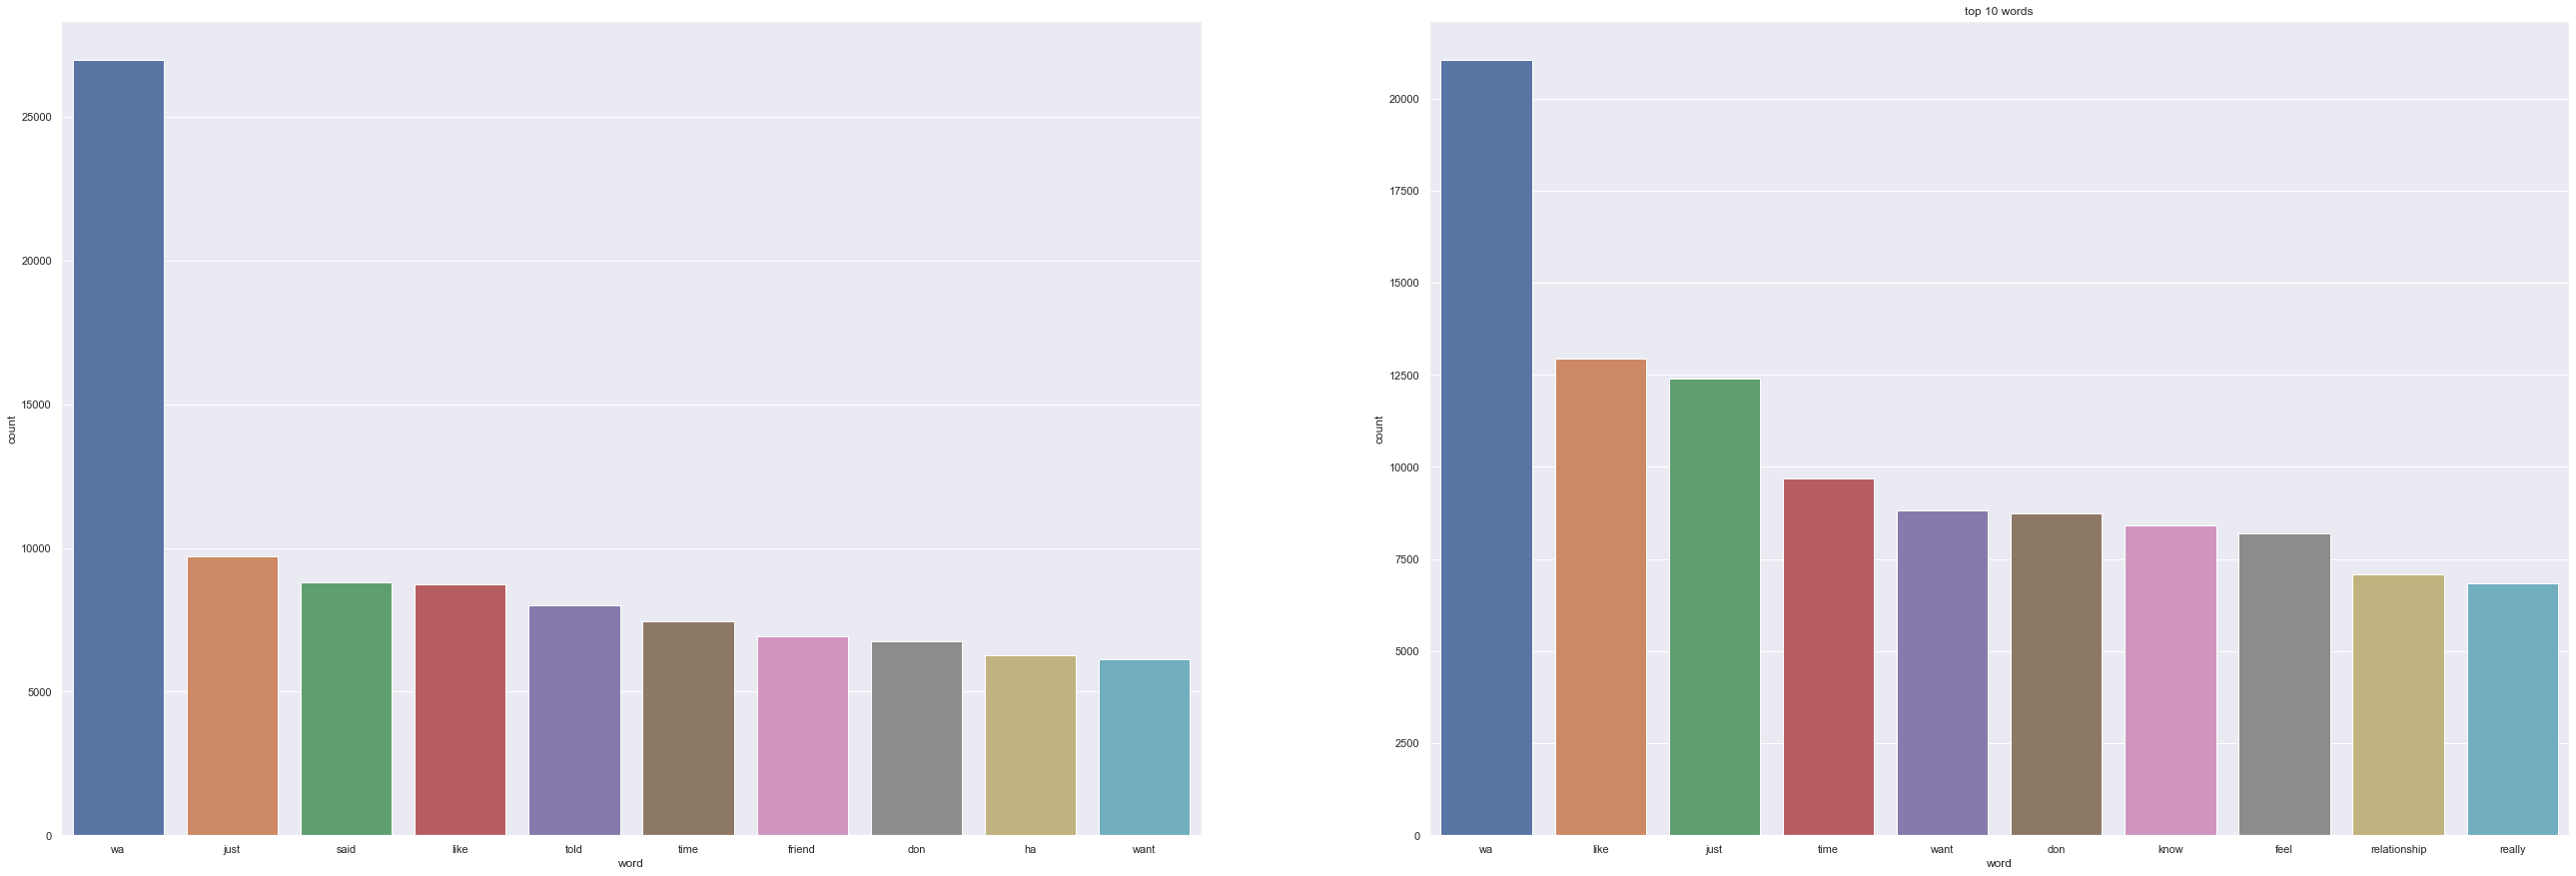

In [22]:
sns.set()

#
fig, axes = plt.subplots(1, 2,figsize=(45, 15))

sns.barplot(data=df_aita_words.head(10), x='word', y='count', ax=axes[0])
sns.barplot(data=df_ra_words.head(10), x='word', y='count', ax=axes[1])
plt.title('top 10 words');

# Polarity Score

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
def polarity_scores(doc):
    return sent.polarity_scores(doc.text)

Doc.set_extension('polarity_scores', getter=polarity_scores, force = True) 
nlp = spacy.blank("en")

In [26]:
#Code from former GA Student jamesproctor
cols = ['neg','neu','pos','compound']
for col in cols:
    df_aita[col] = 0.0

for idx,row in df_aita.iterrows():
    
    doc = nlp(row['selftext'])
    polar_score = doc._.polarity_scores

    df_aita.at[idx,'neg'] = polar_score['neg']
    df_aita.at[idx,'neu'] = polar_score['neu']
    df_aita.at[idx,'pos'] = polar_score['pos']
    df_aita.at[idx,'compound'] = polar_score['compound']

In [27]:
cols = ['neg','neu','pos','compound']
for col in cols:
    df_ra[col] = 0.0

for idx,row in df_ra.iterrows():
    
    doc = nlp(row['selftext'])
    polar_score = doc._.polarity_scores

    df_ra.at[idx,'neg'] = polar_score['neg']
    df_ra.at[idx,'neu'] = polar_score['neu']
    df_ra.at[idx,'pos'] = polar_score['pos']
    df_ra.at[idx,'compound'] = polar_score['compound']

In [28]:
df_ra.head(2)

,author,subreddit,selftext,title,when,neg,neu,pos,compound
0,TaintedOne88,relationship_advice,i just text this man telling him how i felt ab...,A permanent memory,2022-11-24 00:15:02,0.000,0.854,0.146,0.8555
1,UncommonCow56,relationship_advice,ok so a the title say my (m18) girlfriend (f20...,My (M18) gf (F20) keeps dog sitting for a “fri...,2022-11-24 00:13:16,0.075,0.854,0.071,-0.5550


In [29]:
df_ra.tail(2)

,author,subreddit,selftext,title,when,neg,neu,pos,compound
6832,FormerShadow1,relationship_advice,"basically, they think people with depression a...",How do I deal with a person who hates me becau...,2022-11-10 18:20:17,0.133,0.732,0.135,0.7588
6833,zman419,relationship_advice,last time my girlfriend and i spent time with ...,girlfriend is considering not seeing my parent...,2022-11-10 18:19:05,0.143,0.826,0.031,-0.9448


In [30]:
df_aita.head(2)

,author,subreddit,selftext,title,when,neg,neu,pos,compound
0,Cain_Everest,AmItheAsshole,let me preface this: i am one of those guy who...,AITA for letting my former bff rot in prison f...,2022-11-23 23:35:32,0.101,0.768,0.131,0.9347
1,TheVillagerC,AmItheAsshole,"recently, i (21f) met up with my (55m) father....",AITA for never choosing to get closer to my fa...,2022-11-23 23:34:30,0.125,0.794,0.081,-0.9766


In [31]:
df_aita.tail(2)

,author,subreddit,selftext,title,when,neg,neu,pos,compound
6406,Throw32432577,AmItheAsshole,"my fiance m24, and i f25 are in the process of...",AITA for saying that my sister is trying to co...,2022-11-24 12:52:42,0.105,0.835,0.060,-0.9608
6407,krisforsigns,AmItheAsshole,i (21f) am in third year of university. recent...,AITA for not wanting to work on a project anym...,2022-11-24 12:50:39,0.140,0.819,0.041,-0.9848


In [32]:
df_ra.groupby(['subreddit']).mean() 

,neg,neu,pos,compound
subreddit,,,,
relationship_advice,0.091751,0.770602,0.137358,0.355688


In [33]:
df_aita.groupby(['subreddit']).mean()

,neg,neu,pos,compound
subreddit,,,,
AmItheAsshole,0.093158,0.804051,0.10278,0.075528


# Distribution of AITA Polarity

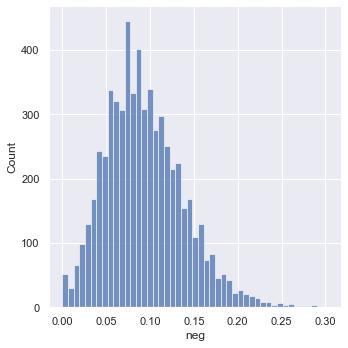

In [31]:

aita_neg = sns.displot(data=df_aita, x =df_aita['neg'])
plt.savefig('aita_negative_distribution.png')

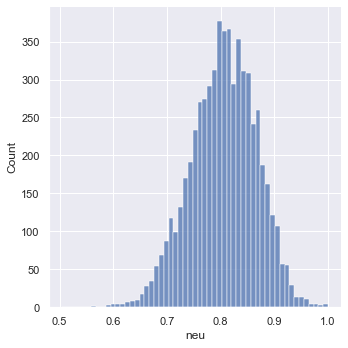

In [32]:

aita_neu = sns.displot(data=df_aita, x =df_aita['neu'])
plt.savefig('aita_neutral_distribution.png')

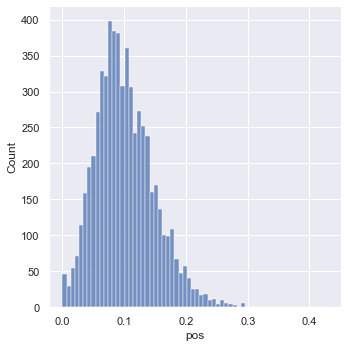

In [33]:

aita_pos = sns.displot(data=df_aita, x =df_aita['pos'])
plt.savefig('aita_positive_distribution.png')

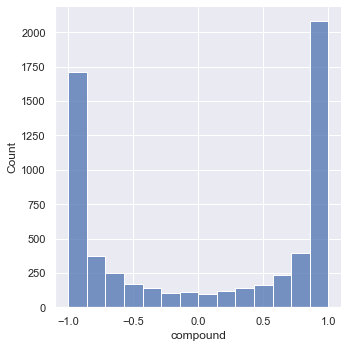

In [34]:

aita_compound = sns.displot(data=df_aita, x =df_aita['compound'])
plt.savefig('aita_compound_distribution.png')

# Distribution of Relationship Advice Polarity

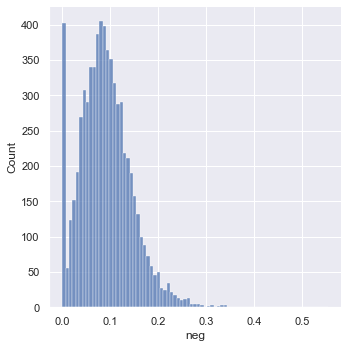

In [35]:

ra_neg = sns.displot(data=df_ra, x =df_ra['neg'])

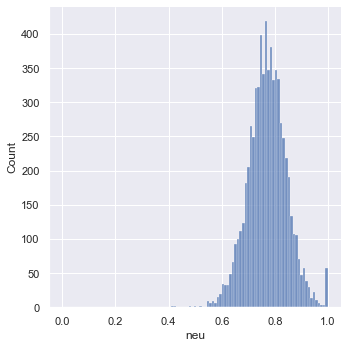

In [36]:

ra_neu = sns.displot(data=df_ra, x =df_ra['neu'])

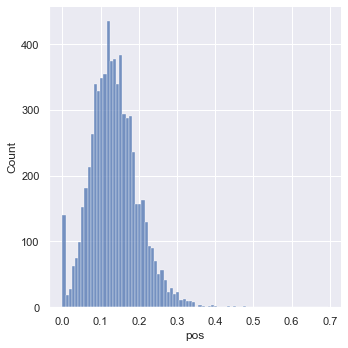

In [37]:

ra_pos = sns.displot(data=df_ra, x =df_ra['pos'])

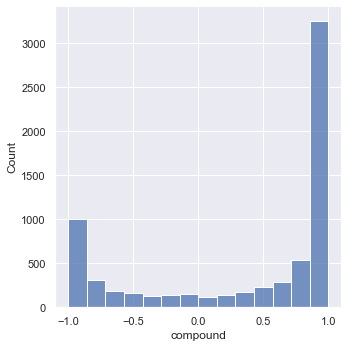

In [38]:

ra_compound = sns.displot(data=df_ra, x =df_ra['compound'])

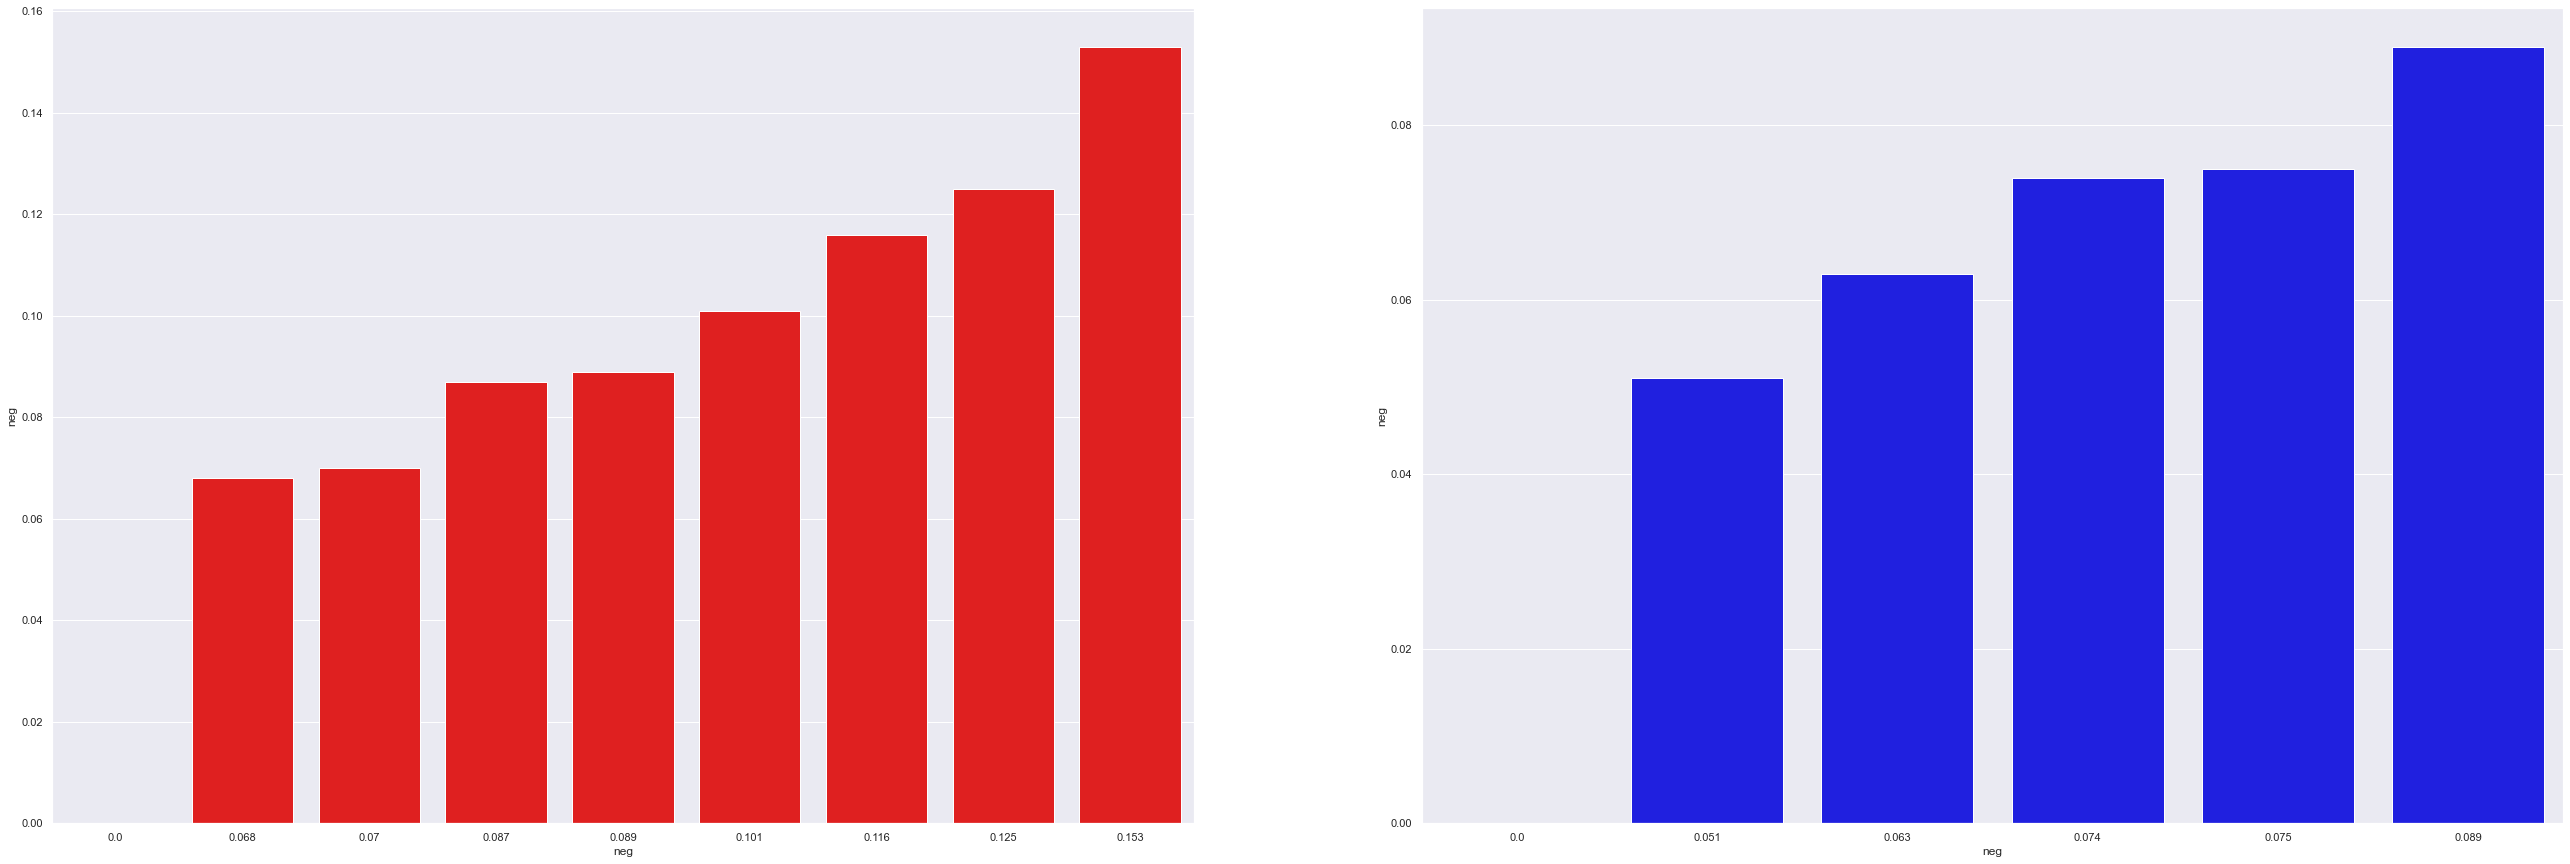

In [39]:
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2,figsize=(45, 15))
sns.barplot(data=df_aita.head(10), x=df_aita['neg'].head(10), y=df_aita['neg'].head(10),color='red', ax=axes[0])
sns.barplot(data=df_ra.head(10), x=df_ra['neg'].head(10), y=df_ra['neg'].head(10),color='blue', ax=axes[1]);

# Comparing words in common from AITA, RA

In [42]:
df_ra_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20725 entries, wa to 静芝
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   word       20725 non-null  object 
 1   count      20725 non-null  int64  
 2   freq       20725 non-null  float64
 3   subreddit  20725 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 809.6+ KB


In [43]:
df_ra_words.head()

,word,count,freq,subreddit
wa,wa,20111,295.445865,relationship_advice
like,like,12730,187.013369,relationship_advice
just,just,12440,182.753048,relationship_advice
time,time,9200,135.154988,relationship_advice
want,want,9080,133.392096,relationship_advice


In [44]:
df_aita_words.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23994 entries, wa to 𝘺𝘰𝘶𝘳
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   word       23994 non-null  object 
 1   count      23994 non-null  int64  
 2   freq       23994 non-null  float64
 3   subreddit  23994 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 937.3+ KB


In [48]:
shared_words= set(df_ra_words['word'].value_counts().index).intersection((set(df_aita_words['word'].value_counts().index)))

In [49]:
df_ra_words['word'].value_counts()

wa          1
60lbs       1
abi         1
aber        1
upholder    1
           ..
irks        1
blurred     1
ironic      1
permit      1
静芝          1
Name: word, Length: 20725, dtype: int64

In [82]:
df_ra_words['shared_words'] = df_ra_words['word'].apply(lambda x: 1 if x in shared_words else 0) #Thank you Ben

In [55]:
df_aita_words['shared_words'] = df_aita_words['word'].apply(lambda x: 1 if x in shared_words else 0)

In [56]:
'like' in shared_words

True

In [59]:
df_ra_words['shared_words'].value_counts()

1    14015
0     6710
Name: shared_words, dtype: int64

In [60]:
df_aita_words['shared_words'].value_counts()

1    14015
0     9979
Name: shared_words, dtype: int64

In [61]:
df_ra_words.head()

,word,count,freq,subreddit,shared_words
wa,wa,20111,295.445865,relationship_advice,1
like,like,12730,187.013369,relationship_advice,1
just,just,12440,182.753048,relationship_advice,1
time,time,9200,135.154988,relationship_advice,1
want,want,9080,133.392096,relationship_advice,1


In [62]:
df_aita_words.head()

,word,count,freq,subreddit,shared_words
wa,wa,24842,408.518336,AmItheAsshole,1
just,just,9425,154.990955,AmItheAsshole,1
said,said,8373,137.691169,AmItheAsshole,1
like,like,8198,134.813353,AmItheAsshole,1
told,told,7585,124.732774,AmItheAsshole,1


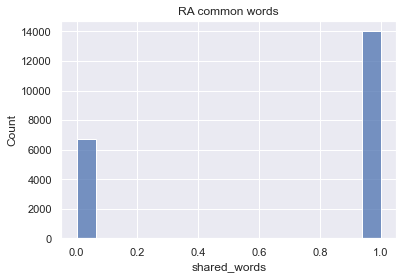

In [100]:
sns.set()
ax1 = sns.histplot(df_ra_words['shared_words']) 
ax1.title.set_text('RA')
plt.title('RA common words');
plt.savefig('RA_Words in Common')

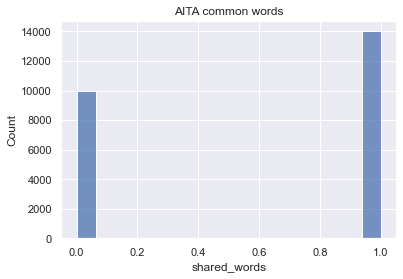

In [103]:
sns.set()
ax2 = sns.histplot(df_aita_words['shared_words'])
ax2.title.set_text('AITA')
plt.title('AITA common words');
plt.savefig('AITA_Words in Common')

In [73]:
data_frame = pd.concat([df_ra,df_aita])
data_frame.head()

,author,subreddit,selftext,title,when,neg,neu,pos,compound
0,TaintedOne88,relationship_advice,i just text this man telling him how i felt ab...,A permanent memory,2022-11-24 00:15:02,0.000,0.854,0.146,0.8555
1,UncommonCow56,relationship_advice,ok so a the title say my (m18) girlfriend (f20...,My (M18) gf (F20) keeps dog sitting for a “fri...,2022-11-24 00:13:16,0.075,0.854,0.071,-0.5550
2,darkglassoverwater,relationship_advice,i'm a junior in high school (male). i have a l...,Friendzone or does she like me?,2022-11-24 00:13:06,0.089,0.726,0.185,0.9800
3,YourAverageThinker,relationship_advice,me and this girl used to talk at the beginning...,Girl (21F) is so confusing I (M21) just don’t ...,2022-11-24 00:12:56,0.075,0.709,0.217,0.9974
4,Illustrious-Ask1708,relationship_advice,i've been seeing this girl who's a the title s...,What's everyone's thoughts on an 18yr old fema...,2022-11-24 00:10:58,0.000,0.933,0.067,0.4380


In [79]:
data_frame_words = pd.concat([df_ra_words,df_aita_words])
data_frame_words.head()

,word,count,freq,subreddit,shared_words
wa,wa,20111,295.445865,relationship_advice,1
like,like,12730,187.013369,relationship_advice,1
just,just,12440,182.753048,relationship_advice,1
time,time,9200,135.154988,relationship_advice,1
want,want,9080,133.392096,relationship_advice,1


# Let's Export for Modeling


In [81]:
data_frame.to_csv('polarity')
data_frame_words.to_csv('word_count')